<a id='top'></a>
## Practical Data Science
### *Assignment 01*


#### Andrew Ellis

# Table of Contents

### [Overview](#overview)
- [Introduction](#intro)
- [Project Objective](#objective)
- [Target Feature](#target_feature)
- [Features Overview](#feats_ovr)

### [Dataset Preparation](#data_prep)
- [Task 1.1: Data Retrieving](#1.1)
- [Task 1.2: Check Datatypes](#1.2)
- [Task 1.3: Typos](#1.3)
- [Task 1.4: Extra-whitespaces](#1.4)
- [Task 1.5: Upper/Lower-case](#1.5)

### [Data Transformation](#data_trans)
- [Data Transformation Review](#data_trans_review)
- [Task 1.6:  Sanity checks](#1.6)
- [Task 1.7: Missing values](#1.7)

### [Dataset Exploration](#data_exp)
- [**Task 2.1: Survey Questions Exploration**](#2.1)
    - [Favourite Star Wars Episodes](#sw_eps_ranked)
- [**Task 2.2: Column Relationships**](#2.3)
    - [2.2.1: Are Star Trek fans also Star Wars Fans?](#sw_st_fans)
    - [**Favourite Star Wars Characters**](#fav_sw_char)
    - [2.2.2: Did Han Shoot First?](#sw_han_shot)
    - [2.2.3: Which Age Groups Like JarJar Binks](#sw_fav_jarjar)
- [**Task 2.3: Exploration of a Specific Survey Question**](#2.3)
    - [2.3.1: Star Wars and their Demographics](#sw_demog)

### [Findings](#findings)
- [Conclusion](#conclusion)

<a id='overview'></a>
## Overview

<a id='intro'></a>
### Introduction

[Andrew Ellis](s3747746@student.rmit.edu.au).

<a id='objective'></a>
### Project Objective
- `Task 01` - In task one it is required to go through and record the **data preparation** phase, cleaning the data, noting errors and insights while preparing it for **data exploration**.
- `Task 02` - This task requires the exploration of the data's *survey questions,* `Please rank the Star Wars films in order of preference.` Exploration of the relationships between columns, *three pairs* of columns are to be focused on, submitting a **plausible hypothesis** for said data. While the last part of `Task 02` requires insight into the relationships between people demographics.

<a id='target_feature'></a>
### Target Feature
- *This is strictlty analysis only, no model necessary*



<a id='feats_ovr'></a>
### Features Overview
*Headers have been overriden to better support a cleaner column naming convention*
**Features**
<hr>

**Categorical Features**

- `Have_Viewed` - Have you seen any of the 6 films in the Star Wars franchise?
- `Is_Fan` - Do you consider yourself to be a fan of the Star Wars film franchise?
- `Seen_<Episode-no.>`- Which of the following Star Wars films have you seen? Please select all that apply. Please note that this feature represents **six** columns, eg. *has the respondent seen episode 1* == `Seen_01` (True, False)
- `Shot_First` - name of character who shot Han Solo first
- `EU_Aware` - Are you familiar with the Expanded Universe?
- `EU_Fan` - Do you consider yourself to be a fan of the Expanded Universe?
- `Trek_Fan` - Do you consider yourself to be a fan of the Star Trek franchise?
- `Gender` - Gender
- `Age` - Age
- `Income` - Household Income
- `Education` - Education
- `Location` - Location (Census Region)

**Ordinal Features**

- `Rank_Episode_<Episode-no.>` - Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film, eg. *Episode II was ranked their second favourite* == `Rank_Movie_02`response(2) *Further any value that is represented as 0 is regarded as a non-answer*
- `Fav_Char_<Character_name>` -  Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her, eg. *They like Obi Wan Kenobi* == `Rank_Char_ObiWan` response('favorably')

In [1]:
# importing all modules requried for project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id='data_prep'></a>
## Data Preparation

<a id='1.1'></a>
### Task 1.1: Data Retrieving

In [2]:
# LOCAL
SW_FILE = 'datasets/StarWars.csv'

header_index = ['ID', 'Have_Viewed', 'Is_Fan', 'Seen_01', 'Seen_02', 'Seen_03', 'Seen_04', 'Seen_05', 'Seen_06', 
                'Rank_Episode_01', 'Rank_Episode_02', 'Rank_Episode_03', 'Rank_Episode_04','Rank_Episode_05', 
                'Rank_Episode_06', 'Fav_Char_Han', 'Fav_Char_Luke', 'Fav_Char_Leia', 'Fav_Char_Anakin', 'Fav_Char_Obi', 
                'Fav_Char_Palpatine', 'Fav_Char_Vader', 'Fav_Char_Lando', 'Fav_Char_Fett', 'Fav_Char_3PO', 'Fav_Char_R2', 
                'Fav_Char_Jar', 'Fav_Char_Padme', 'Fav_Char_Yoda', 'Shot_First', 'EU_Aware', 'EU_Fan', 'Trek_Fan', 'Gender', 
                'Age', 'Income', 'Education', 'Location']
    
df = pd.read_csv(SW_FILE, delimiter=',', skiprows=1)

# Preprocessing - adding cleaner column names, dropping redundant id column and ignoring first row
df.columns = header_index
df.drop(['ID'], axis=1, inplace=True)

Column headers that were given were too elaborate, so I created shortened/descriptive names. [Above](#feats_ovr) I overview my intentions on the dataset feartures, on how they will behave in this given dataframe

In [3]:
print(f"Size of the dataset is (rows, cols) {df.shape}\n")

Size of the dataset is (rows, cols) (1186, 37)



In [4]:
print(f"Dataset Unique Values:\n\n{'Feature':<30}{'Unique Values':>15}\n")
for item in df:
    print(f"{item:<30}{df[item].nunique():>15}")

Dataset Unique Values:

Feature                         Unique Values

Have_Viewed                                 3
Is_Fan                                      4
Seen_01                                     1
Seen_02                                     1
Seen_03                                     1
Seen_04                                     1
Seen_05                                     1
Seen_06                                     1
Rank_Episode_01                             6
Rank_Episode_02                             6
Rank_Episode_03                             6
Rank_Episode_04                             6
Rank_Episode_05                             6
Rank_Episode_06                             6
Fav_Char_Han                                6
Fav_Char_Luke                               6
Fav_Char_Leia                               6
Fav_Char_Anakin                             6
Fav_Char_Obi                                6
Fav_Char_Palpatine                          6
Fav_Char_

We can notice above that specific features such as `Have_Seen`, `Is_Fan`, `Trek_Fan` all have more than **two** unique answers where it should either be 'Yes' or 'No.' Assuming there may be 'Nan' values we will have to invesigate whether or not those rows will still be valuable.

<a id='1.2'></a>
### Task 1.2: Check Datatypes

In [5]:
df.dtypes

Have_Viewed            object
Is_Fan                 object
Seen_01                object
Seen_02                object
Seen_03                object
Seen_04                object
Seen_05                object
Seen_06                object
Rank_Episode_01       float64
Rank_Episode_02       float64
Rank_Episode_03       float64
Rank_Episode_04       float64
Rank_Episode_05       float64
Rank_Episode_06       float64
Fav_Char_Han           object
Fav_Char_Luke          object
Fav_Char_Leia          object
Fav_Char_Anakin        object
Fav_Char_Obi           object
Fav_Char_Palpatine     object
Fav_Char_Vader         object
Fav_Char_Lando         object
Fav_Char_Fett          object
Fav_Char_3PO           object
Fav_Char_R2            object
Fav_Char_Jar           object
Fav_Char_Padme         object
Fav_Char_Yoda          object
Shot_First             object
EU_Aware               object
EU_Fan                 object
Trek_Fan               object
Gender                 object
Age       

Most datatypes here are object and a few floats, the goal from here will be converting most binary questions into `int` while ranking such as `Rank_Episode_01` will be additionally covnverted into `int` to best represent it as an ordinal system.

<a id='uniq-val'></a>
### Unique Values

In [6]:
cat_columns = df.columns[df.dtypes==object].tolist()

for col in cat_columns:
    print('\n' + col + '\n')
    print(df[col].unique())


Have_Viewed

['Yes' 'No' 'Yes ']

Is_Fan

['Yes' nan 'No' 'Yess' 'Noo']

Seen_01

['Star Wars: Episode I  The Phantom Menace' nan]

Seen_02

['Star Wars: Episode II  Attack of the Clones' nan]

Seen_03

['Star Wars: Episode III  Revenge of the Sith' nan]

Seen_04

['Star Wars: Episode IV  A New Hope' nan]

Seen_05

['Star Wars: Episode V The Empire Strikes Back' nan]

Seen_06

['Star Wars: Episode VI Return of the Jedi' nan]

Fav_Char_Han

['Very favorably' nan 'Somewhat favorably'
 'Neither favorably nor unfavorably (neutral)' 'Somewhat unfavorably'
 'Unfamiliar (N/A)' 'Very unfavorably']

Fav_Char_Luke

['Very favorably' nan 'Somewhat favorably' 'Somewhat unfavorably'
 'Neither favorably nor unfavorably (neutral)' 'Very unfavorably'
 'Unfamiliar (N/A)']

Fav_Char_Leia

['Very favorably' nan 'Somewhat favorably' 'Somewhat unfavorably'
 'Neither favorably nor unfavorably (neutral)' 'Very unfavorably'
 'Unfamiliar (N/A)']

Fav_Char_Anakin

['Very favorably' nan 'Somewhat favorably' 'So

Above we are able to spot obvious typos in features such as `EU_Fan` and `IS_Fan`. We are also able to analyse categorical and ordinal features such as `Income`, `Education` and `Fav_Char_`, this is beneficial in exploring how the ordinal and categorical features explain the data set.

[Back to Top](#top)

<a id='1.3'></a>
### Task 1.3: Typos

Typos found in: 
- `Is_Fan` - *Yess*
- `EU_Fan` - *Yess*
- `Trek_Fan` - *Noo*

These errors were handled in the process of converting the values into numerical representations, such that *Yess* would have been converted into a 1

<a id='1.4'></a>
### Task 1.4: Exta-whitespace

White Spacefound in `Have_Viewed` which contained the string 'Yes ', as above this was handled in the transformation process converting positive responses into 1's

<a id='1.5'></a>
### Task 1.5: Upper/Lower-case

Cases:

- `Gender`
- `Trek_Fan`

Both above features contained multiple responses with either 'Yes' or 'yes' | 'Male' or 'male'.
This was handled in the data transformation process when converting values into a binary format.

[Back to Top](#top)

<a id='data_trans'></a>
## Data Transformation
*Please take note that in this section all previous analysis and error finding is cleaned and processed in the underneath code*
<br></br>
**This is to better show the practical problem solving**

In [7]:
# For Have_Viewed feature we are converting into an int with 1 == 'Yes'
df.Have_Viewed = pd.np.where(df.Have_Viewed.str.contains('(?i)[y]', regex=True), 1, 0)
# convert feature dtype to int
df.Have_Viewed = df.Have_Viewed.astype(int)

In [8]:
# For Is_Fan feature we are converting into an int with 1 == 'Yes' and as noted in Task 1.7: Missing Values
df.Is_Fan = pd.np.where(df.Is_Fan.str.contains('(?i)[y]', regex=True), 1, 0)
# convert feature dtype to int
df.Is_Fan = df.Is_Fan.astype(int)

In [9]:
# If feature Seen_<ep> is not NaN then it is given 1 to show true, as seen in investigation there
# is only one given value in these features
def replace_seen_value(dataframe):
    dataframe.fillna(0, inplace=True)
    dataframe = pd.np.where(dataframe.str.contains('0'), 0, 1)
    dataframe = dataframe.astype(int)
    return dataframe
    
df.Seen_01 = replace_seen_value(df.Seen_01)
df.Seen_02 = replace_seen_value(df.Seen_02)
df.Seen_03 = replace_seen_value(df.Seen_03)
df.Seen_04 = replace_seen_value(df.Seen_04)
df.Seen_05 = replace_seen_value(df.Seen_05)
df.Seen_06 = replace_seen_value(df.Seen_06)

In [10]:
# Converting feature 'Rank_Episode' from float into in, then inputing all non-value 
# responses as 0 to signify no answer
df.Rank_Episode_01.fillna(0, inplace=True)
df.Rank_Episode_02.fillna(0, inplace=True)
df.Rank_Episode_03.fillna(0, inplace=True)
df.Rank_Episode_04.fillna(0, inplace=True)
df.Rank_Episode_05.fillna(0, inplace=True)
df.Rank_Episode_06.fillna(0, inplace=True)

df.Rank_Episode_01 = df.Rank_Episode_01.astype(int)
df.Rank_Episode_02 = df.Rank_Episode_02.astype(int)
df.Rank_Episode_03 = df.Rank_Episode_03.astype(int)
df.Rank_Episode_04 = df.Rank_Episode_04.astype(int)
df.Rank_Episode_05 = df.Rank_Episode_05.astype(int)
df.Rank_Episode_06 = df.Rank_Episode_06.astype(int)

In [11]:
# For all characters in 'Fav_Char_<name>' where there is a null value, is will be converted to the pre-defined
# Unfamiliar (N/A)
df.Fav_Char_3PO.fillna('Unfamiliar (N/A)', inplace=True)
df.Fav_Char_Anakin.fillna('Unfamiliar (N/A)', inplace=True)
df.Fav_Char_Fett.fillna('Unfamiliar (N/A)', inplace=True)
df.Fav_Char_Han.fillna('Unfamiliar (N/A)', inplace=True)
df.Fav_Char_Jar.fillna('Unfamiliar (N/A)', inplace=True)
df.Fav_Char_Lando.fillna('Unfamiliar (N/A)', inplace=True)
df.Fav_Char_Leia.fillna('Unfamiliar (N/A)', inplace=True)
df.Fav_Char_Luke.fillna('Unfamiliar (N/A)', inplace=True)
df.Fav_Char_Obi.fillna('Unfamiliar (N/A)', inplace=True)
df.Fav_Char_Padme.fillna('Unfamiliar (N/A)', inplace=True)
df.Fav_Char_Palpatine.fillna('Unfamiliar (N/A)', inplace=True)
df.Fav_Char_R2.fillna('Unfamiliar (N/A)', inplace=True)
df.Fav_Char_Vader.fillna('Unfamiliar (N/A)', inplace=True)
df.Fav_Char_Yoda.fillna('Unfamiliar (N/A)', inplace=True)

In [12]:
# For all empty values in 'Shot_First' they will be replace with a string "Non-Response"
df.Shot_First.fillna('Non-Response', inplace=True)

In [13]:
# Feature 'EU_Aware' will be converted into an int, Yes,No(1,0) and NaN values will be filled as -1
df.EU_Aware.replace('Yes', 1, inplace=True)
df.EU_Aware.replace('No', 0, inplace=True)
df.EU_Aware.fillna(-1, inplace=True)
df.EU_Aware = df.EU_Aware.astype(int)

In [14]:
# Feature 'EU_Fan' will be converted into an int, Yes,No,NaN(1,0,-1)
df.EU_Fan.replace('Yes', 1, inplace=True)
df.EU_Fan.replace('Yess', 1, inplace=True)
df.EU_Fan.replace('No', 0, inplace=True)
df.EU_Fan.fillna(-1, inplace=True)
df.EU_Fan = df.EU_Fan.astype(int)

In [15]:
# Trek_Fan will be converted to an int with values Yes,No,NaN(1,0,-1)
df.Trek_Fan.replace('Yes', 1, inplace=True)
df.Trek_Fan.replace('yes', 1, inplace=True)
df.Trek_Fan.replace('No', 0, inplace=True)
df.Trek_Fan.replace('no ', 0, inplace=True)
df.Trek_Fan.replace('Noo', 0, inplace=True)
df.Trek_Fan.fillna(-1, inplace=True)
df.Trek_Fan = df.Trek_Fan.astype(int)

In [16]:
# Gender as this can be sensitive data and responses do not state anything specifically other than male or female
# then all NaN will be labeled as -1 for Non-Response
df.Gender.replace('Male', 1, inplace=True)
df.Gender.replace('male', 1, inplace=True)
df.Gender.replace('Female', 0, inplace=True)
df.Gender.replace('F', 0, inplace=True)
df.Gender.replace('female', 0, inplace=True)
df.Gender.fillna(-1, inplace=True)
df.Gender = df.Gender.astype(int)

In [17]:
# For the feature 'Age' values that were given were ['18-29' nan '500' '30-44' '> 60' '45-60']
# Decision is to leave the NaN and convert the '500' into NaN
df.Age.replace('500', np.NaN, inplace=True)

In [18]:
df.head(4)

,Have_Viewed,Is_Fan,Seen_01,Seen_02,Seen_03,Seen_04,Seen_05,Seen_06,Rank_Episode_01,Rank_Episode_02,...,Fav_Char_Yoda,Shot_First,EU_Aware,EU_Fan,Trek_Fan,Gender,Age,Income,Education,Location
0,1,1,1,1,1,1,1,1,3,2,...,Very favorably,I don't understand this question,1,0,0,1,18-29,NaN,High school degree,South Atlantic
1,0,1,0,0,0,0,0,0,0,0,...,Unfamiliar (N/A),Non-Response,-1,-1,1,1,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,1,0,1,1,1,0,0,0,1,2,...,Unfamiliar (N/A),I don't understand this question,0,-1,0,1,18-29,"$0 - $24,999",High school degree,West North Central
3,1,1,1,1,1,1,1,1,5,6,...,Very favorably,I don't understand this question,0,-1,1,1,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


<a id='data_trans_review'></a>
### Data Transformation Review

The biggest decision made here was to not allow 'NaN' values in the features `Have_Viewed` and `Is_Fan`. This decision was made to create a clear decision in the dataset between acknowledged fans and other. 'NaN' values however were kept in for most features, such as `Trek_Fan` this was to acknowledge that the behaviour of ignoring to answer a question was relevant to the dataset.

In [19]:
print(f"Dataset Unique Values:\n\n{'Feature':<30}{'Unique Values':>15}\n")
for item in df:
    print(f"{item:<30}{df[item].nunique():>15}")

Dataset Unique Values:

Feature                         Unique Values

Have_Viewed                                 2
Is_Fan                                      2
Seen_01                                     2
Seen_02                                     2
Seen_03                                     2
Seen_04                                     2
Seen_05                                     2
Seen_06                                     2
Rank_Episode_01                             7
Rank_Episode_02                             7
Rank_Episode_03                             7
Rank_Episode_04                             7
Rank_Episode_05                             7
Rank_Episode_06                             7
Fav_Char_Han                                6
Fav_Char_Luke                               6
Fav_Char_Leia                               6
Fav_Char_Anakin                             6
Fav_Char_Obi                                6
Fav_Char_Palpatine                          6
Fav_Char_

To note: The only features left binary are `Have_Viewed`, `Is_Fan` and `Seen_`. The rest shows a clean and responsible amount of responses.

In [20]:
df.dtypes

Have_Viewed            int64
Is_Fan                 int64
Seen_01                int64
Seen_02                int64
Seen_03                int64
Seen_04                int64
Seen_05                int64
Seen_06                int64
Rank_Episode_01        int64
Rank_Episode_02        int64
Rank_Episode_03        int64
Rank_Episode_04        int64
Rank_Episode_05        int64
Rank_Episode_06        int64
Fav_Char_Han          object
Fav_Char_Luke         object
Fav_Char_Leia         object
Fav_Char_Anakin       object
Fav_Char_Obi          object
Fav_Char_Palpatine    object
Fav_Char_Vader        object
Fav_Char_Lando        object
Fav_Char_Fett         object
Fav_Char_3PO          object
Fav_Char_R2           object
Fav_Char_Jar          object
Fav_Char_Padme        object
Fav_Char_Yoda         object
Shot_First            object
EU_Aware               int64
EU_Fan                 int64
Trek_Fan               int64
Gender                 int64
Age                   object
Income        

All 'Yes', 'No' or 'non-response' features have been converted into `int64`

<a id='1.6'></a>
### Task 1.6: Sanity Checks

The only slight instance found here was with the feature `Age` in which had a value '500'. To handle this the value was replaced with 'NaN'. Due to a previous decision of allowing None values in the data set.

Otherwise looking over unique value responses and edge cases in `Age` and `Income` there were no issues further found.

<a id='1.7'></a>
### Task 1.7: Missing Values

- By careful analysis I found that where respondents had left the feature `Is_Fan` empty they had also not watched any of the movies **This can be seen in the two below tables**. So it was a decision to replace feature `Is_Fan` 'Nan' values with 0 representing *not a fan*. 


- The feature `Shot_First` also included null values that were converted to a string value of 'non-response'.

In [21]:
df_test = pd.read_csv(SW_FILE, delimiter=',', skiprows=1)

# Preprocessing - adding cleaner column names, dropping redundant id column and ignoring first row
df_test.columns = header_index
df_test.drop(['ID'], axis=1, inplace=True)

In [22]:
X = df_test[df_test['Is_Fan'].isna()]
X.iloc[:,1:8]

,Is_Fan,Seen_01,Seen_02,Seen_03,Seen_04,Seen_05,Seen_06
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
X = df_test[(df_test['Is_Fan'].isna()) == False]
X.iloc[:,1:8]

,Is_Fan,Seen_01,Seen_02,Seen_03,Seen_04,Seen_05,Seen_06
0,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
3,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
4,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
5,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
6,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
7,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
8,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
9,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN
12,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


[Back to Top](#top)

<a id='data_exp'></a>
## Dataset Exploration

In [24]:
df.head()

,Have_Viewed,Is_Fan,Seen_01,Seen_02,Seen_03,Seen_04,Seen_05,Seen_06,Rank_Episode_01,Rank_Episode_02,...,Fav_Char_Yoda,Shot_First,EU_Aware,EU_Fan,Trek_Fan,Gender,Age,Income,Education,Location
0,1,1,1,1,1,1,1,1,3,2,...,Very favorably,I don't understand this question,1,0,0,1,18-29,NaN,High school degree,South Atlantic
1,0,1,0,0,0,0,0,0,0,0,...,Unfamiliar (N/A),Non-Response,-1,-1,1,1,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,1,0,1,1,1,0,0,0,1,2,...,Unfamiliar (N/A),I don't understand this question,0,-1,0,1,18-29,"$0 - $24,999",High school degree,West North Central
3,1,1,1,1,1,1,1,1,5,6,...,Very favorably,I don't understand this question,0,-1,1,1,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,1,1,1,1,1,1,1,1,5,4,...,Somewhat favorably,Greedo,1,0,0,1,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


<a id='2.1'></a>
# Task 2.1: Survey Questions Exploration

In [25]:
# return a dictionary of movies how many times they were rated by preference
def pref_list(data, preference):
    pref = dict()

    for item in data:
        # count of occurrences of preference number
        value = data[item].value_counts()
        
        # dictionary {movie: preference count}
        d = {item: value[preference]}

        pref.update(d)

    return pref

In [26]:
X = df.filter(['Rank_Episode_01', 'Rank_Episode_02', 'Rank_Episode_03', 'Rank_Episode_04', 'Rank_Episode_05', 'Rank_Episode_06'], axis=1)

<a id='sw_eps_ranked'></a>
## Favourite Star Wars Episodes

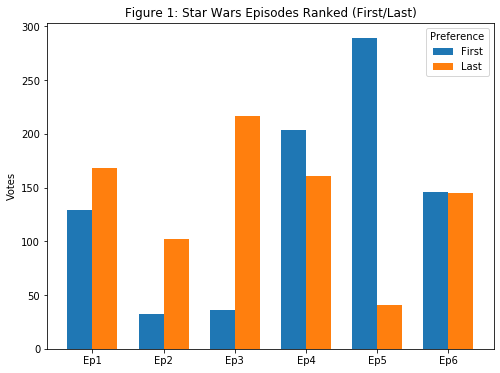

In [27]:
# plot movies over how many times they've been rated number one preference
pref_no1 = pref_list(X, 1)
pref_no6 = pref_list(X, 6)

N = len(pref_no1)
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(8,6))

plt.bar(ind, pref_no1.values(), width, label='First')
plt.bar(ind + width, pref_no6.values(), width, label='Last')

plt.ylabel('Votes')
plt.title('Figure 1: Star Wars Episodes Ranked (First/Last)')

plt.xticks(ind + width / 2, ('Ep1', 'Ep2', 'Ep3', 'Ep4', 'Ep5', 'Ep6'))
plt.legend(title='Preference', loc='best')
plt.show()

### Notes: 
- In `Episode 2`, `Episode 3` and `Episode 5` it's clear that there is disproportion in weight from one preference to the other. In the case of `Episode 2` and `Episode 3` there a more votes of **least favourite** compared to **most**. While the opposite has happened in the case of `Episode 5`. **A hypothesis here would be votes suggest Star Wars: Episode One and Two are the least favourite movies while Star Wars Episode 5 would be voted as the most favoured movie.**


- An additional note is that **Star Wars Episode Six** is the most disputed movie in the series as it shares an even amount of **least** and **most** favoured votes.

[Back to Top](#top)

<a id='2.2'></a>
# Task 2.2: Column Relationships

<a id='sw_st_fans'></a>
## 2.2.1: Are Star Trek fans also Star Wars Fans?

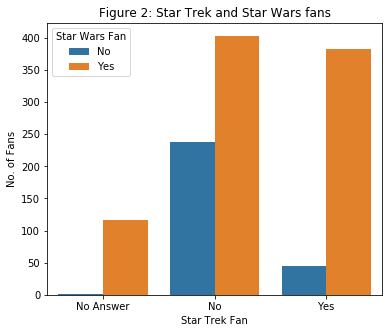

In [28]:
# first pair Have_Viewed and Is_Fan
df_pair1 = df.filter(['Trek_Fan', 'Is_Fan'], axis=1)

plt.figure(figsize=(6,5))

ax = sns.countplot(x="Trek_Fan", hue="Is_Fan", data=df_pair1)

ax.set_title('Figure 2: Star Trek and Star Wars fans')
ax.set_xlabel('Star Trek Fan')
ax.set_ylabel('No. of Fans')

plt.legend(title='Star Wars Fan', loc='upper left', labels=['No', 'Yes'])

ax.set(xticks=range(0, 3), xticklabels=list(['No Answer', 'No', 'Yes']))

plt.show()

### Notes:
In figure 2 we can see that there are an equal number of fans that like and do not like `Star Trek`. Yet we see a larger discrepancy between those who are not fans of `Star Wars`, only a few of these respondents are fans of `Star Trek`.


My hypothesis given these results of the data set led me to the conclusion that there is a closer correlation between those who are not fans of both `Star Trek` and `Star Wars`. This could be due to the assumption that those who are fans of science-fiction will be fans of both `Star Wars` and `Star Trek`.

[Back to Top](#top)

<a id='fav_sw_char'></a>
## Favourite Star Wars Characters

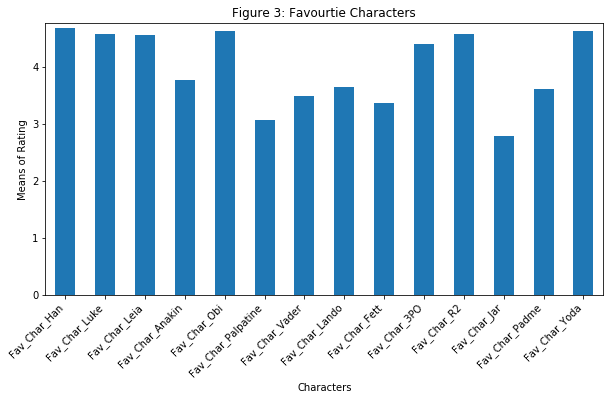

In [29]:
# Finding out who the most favoured characters are in the Star Wars Universe
mask_fav = { 
            'Very favorably': 5,
            'Somewhat favorably': 4, 
            'Neither favorably nor unfavorably (neutral)': 3,
            'Somewhat unfavorably': 2, 
            'Very unfavorably': 1
           }

characters = df.iloc[:, 14:28]

for char in characters:
    characters[char] = characters[char].map(mask_fav)
    

fig = plt.figure(figsize=(10,5))
    
fig = characters.mean().plot(kind='bar')

plt.margins(0.02)
plt.title('Figure 3: Favourtie Characters')
plt.ylabel('Means of Rating')
plt.xlabel('Characters')

fig.set_xticklabels(characters.columns, rotation = 45, ha="right")
plt.show()

### Notes:
From the above we can assume that from the respondents' votes `Palpatine` and `JarJar` are the least like characters in the Star Wars Universe.

<a id='sw_han_shot'></a>
## 2.2.2 Did Han Shoot First?

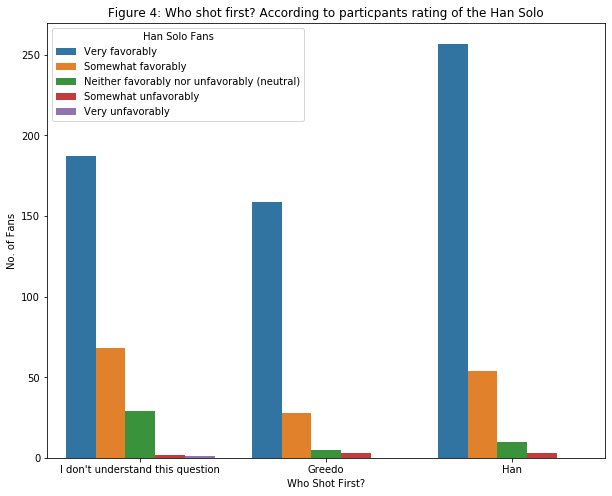

In [30]:
# second pair fans of Han Solo and who shot first
df_pair2 = df.filter(['Fav_Char_Han', 'Shot_First'], axis=1)
df_pair2 = df_pair2[df_pair2['Fav_Char_Han'] != 'Unfamiliar (N/A)']
df_pair2 = df_pair2[df_pair2['Shot_First'] != 'Non-Response']

fig = plt.figure(figsize=(10,8))

ax = sns.countplot(x="Shot_First", hue="Fav_Char_Han", data=df_pair2)

ax.set_title('Figure 4: Who shot first? According to particpants rating of the Han Solo')
ax.set_xlabel('Who Shot First?')
ax.set_ylabel('No. of Fans')

plt.legend(title='Han Solo Fans', loc='upper left')

plt.show()

fig.savefig('Figure04.png', bbox_inches='tight')

### Notes:
It's first noticed that all distributions of `Han Solo's` raters, **except `Very Favourable,`** all follow the same pattern. The highest votes are for 'I don't understand this question' to `Han` and then `Greedo`. In the case for respondents who voted `Han Solo` **`Very Favourable`** they all voted that `Han shot first`.

Hypothesis being that those who are the biggest fans of `Han Solo` believe most of all that 'Han shot first.'

[Back to Top](#top)

<a id='sw_fav_jarjar'></a>
## 2.2.3: Which Age Groups Like JarJar Binks

In [31]:
# third pair fans of Jar Jar Binks and Age
df_pair3 = df.filter(['Fav_Char_Jar', 'Age'], axis=1)

fav_jar_true = df_pair3.loc[df_pair3['Fav_Char_Jar'] == 'Very favorably']
fav_jar_false = df_pair3.loc[df_pair3['Fav_Char_Jar'] == 'Very unfavorably']

fav_jar_true = fav_jar_true.rename(columns={'Fav_Char_Jar': 'Favourite'})
fav_jar_false = fav_jar_false.rename(columns={'Fav_Char_Jar': 'Not Favourite'})

fav_jar_true = fav_jar_true.groupby('Age').agg('count')
fav_jar_false = fav_jar_false.groupby('Age').agg('count')

result = pd.merge(fav_jar_true, fav_jar_false, on=['Age'])

<Figure size 432x288 with 0 Axes>

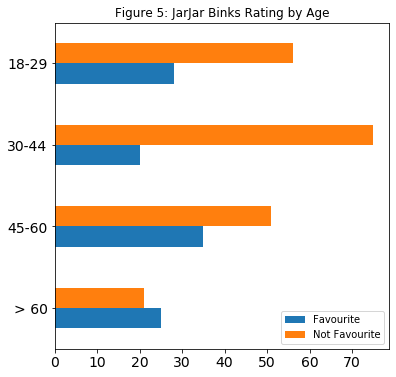

In [32]:
plt.figure()

result.sort_index(ascending=False).plot(
    kind='barh',
    figsize=(6, 6),
    fontsize=14,
    title='Figure 5: JarJar Binks Rating by Age'
    ).yaxis.label.set_visible(False)

### Notes:
As seen in **Figure 3** we can see that overall `JarJar` is the least favourite character in Star Wars, according to this sample. In the above figure we can see that the `age group` that shows the biggest discrepancy are those aged from **30-44.** Interestingly those who are above the age of **60** seem to favour `JarJar` more than their lowest rating, this is marginally.


Under the assumption that these ages reflect current times; then we could make a hypothesis that those who were *children or teenagers* at the time of `JarJar Binks` introduction into the Star Wars universe are most likely to favour him the least.

[Back to Top](#top)

<a id='2.3'></a>
# Task 2.3: Exploration of a Specific Survey Question

In [33]:
# using characters from previous mask output
# Adding a new column for a mean of overall characters rating 

# making sure the adding of a 'mean' column  will be appropriate
print(df.shape)
print(characters.shape)

df['char_rating_mean'] = characters.mean(axis=1)

(1186, 37)
(1186, 14)


<a id='sw_demog'></a>
## 2.3.1: Star Wars and their Demographics

In [34]:
def plot_character_demographic_ratings(data, demographics):
    
    fig = plt.figure()
    
    ax1 = fig.add_subplot(324)
    ax2= fig.add_subplot(322)
    ax3= fig.add_subplot(323)
    ax4= fig.add_subplot(321)
    ax5= fig.add_subplot(325)
    
    fig.set_size_inches(12, 15)
    fig.tight_layout(pad=8)
    
    fig.suptitle('Figure 6: Overall Character Ratings by Demographic', fontsize=16)
    
    axes = [ax1, ax2, ax3, ax4, ax5]
    
    for index, col in enumerate(demographics):
                
        temp = data.groupby(col).agg('count')
        
        temp.filter([col, 'char_rating_mean'], axis=1).sort_index(ascending=False).plot(
            kind='barh',
            fontsize=14,
            title='Character Rating by ' + col,
            legend=False,
            ax=axes[index]
            ).yaxis.label.set_visible(False)
        
    plt.show()

In [35]:
# renaming of Gender for visualisation
mask_gender = { 
            -1: 'Non-response',
            0: 'Female', 
            1: 'Male'
           }

df['Gender'] = df['Gender'].map(mask_gender)

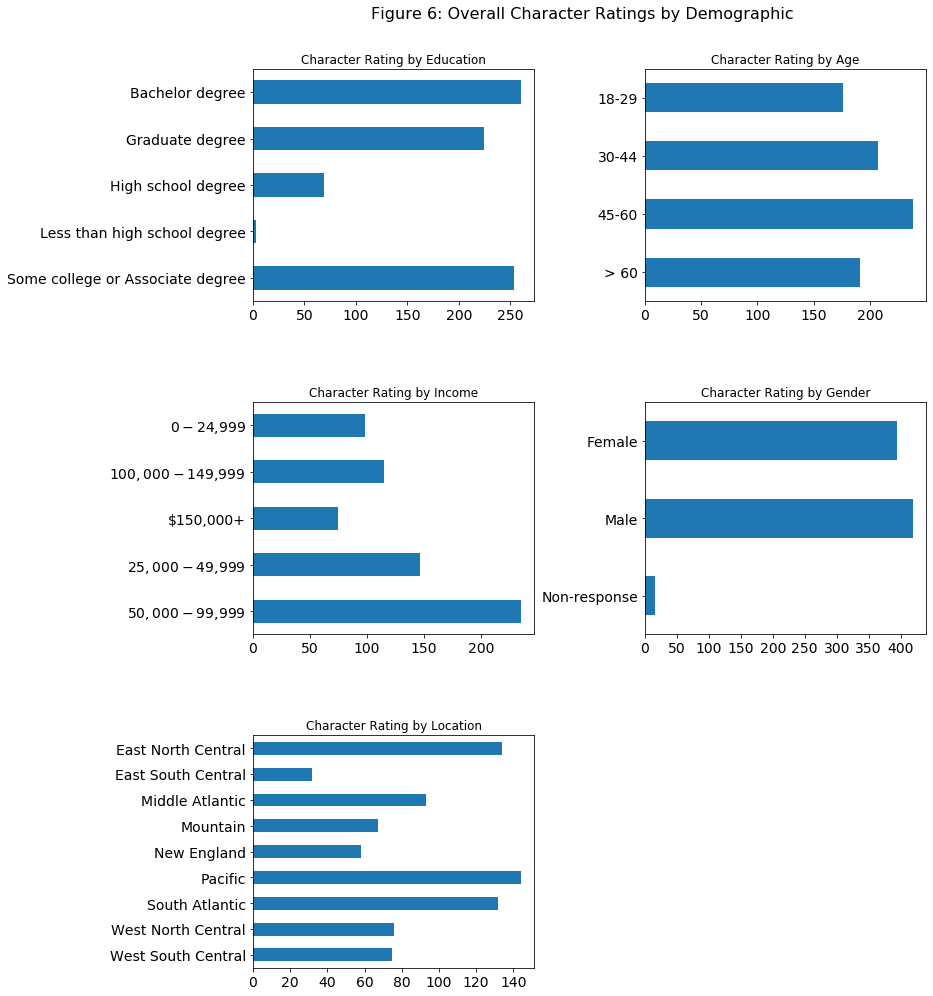

In [36]:
# Chosen columns to view ratings over
demographic = ['Gender', 'Age', 'Income', 'Education', 'Location']

plot_character_demographic_ratings(df, demographic)

### Notes:

- There didn’t seem to be very distinct differences over demographics when it came to age and gender, and no specific correlation between location.


- However it is noticed that those who did favour Star Wars characters more were those with further education and an income of 50,000 - 99,999.


- In a report on Higher Education Earnings  Baum [1] showed a US total  “Median Earnings of Bachelor’s Degree Recipients Ages 25 and Older Working Full-Time Full-Year” was approximately $58,000. 


- With said information we could make an assumption that there is a correlation between our higher education numbers and the income bracket of 50,000 - 99,999. 


- Leading us to a hypothesis that our data strongly suggests that those with a higher education view Star Wars characters more favourably.



### References

[1]	S. Baum, “Higher Education Earnings Premium. Value, Variation, and Trends” Urban Institute, Washington D.C, United States, 2014.

[Back to Top](#top)